In [1]:
import IPython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### **1 Reading Metadata File**

In [2]:
df_meta = pd.read_csv('data/sample_metadata.tsv', sep='\t')
df_meta.head()

,sampleid,stool_consistency,hct_source,disease,categorical_time_relative_to_engraftment,week_relative_to_hct,timepoint_of_transplant,day_relative_to_nearest_hct,alleged_abduction
0,N4VICF,formed,cord,Myelodysplastic Syndromes,pre,-1.0,6.0,-6.0,0
1,8A0F9A,formed,cord,Leukemia,pre,-2.0,7.0,-7.0,0
2,5Y49IM,semi-formed,cord,Leukemia,peri,-1.0,7.0,0.0,1
3,ZKJI45,semi-formed,cord,Leukemia,post,1.0,7.0,8.0,0
4,2I7SIQ,liquid,cord,Leukemia,peri,-1.0,0.0,0.0,1


In [3]:
df_meta.shape

(161, 9)

To get the data from range of rows with specific column names

In [4]:
df_meta.loc[10:12, ["disease", "alleged_abduction"]]

,disease,alleged_abduction
10,Non-Hodgkin's Lymphoma,0
11,Non-Hodgkin's Lymphoma,0
12,Non-Hodgkin's Lymphoma,0


List all the columns as a list:

In [5]:
df_meta.columns.tolist()

['sampleid',
 'stool_consistency',
 'hct_source',
 'disease',
 'categorical_time_relative_to_engraftment',
 'week_relative_to_hct',
 'timepoint_of_transplant',
 'day_relative_to_nearest_hct',
 'alleged_abduction']

In [6]:
for column_name in df_meta:
    print(f'{column_name}: {len(df_meta[column_name].unique())} unique elements')

sampleid: 161 unique elements
stool_consistency: 3 unique elements
hct_source: 3 unique elements
disease: 5 unique elements
categorical_time_relative_to_engraftment: 4 unique elements
week_relative_to_hct: 6 unique elements
timepoint_of_transplant: 15 unique elements
day_relative_to_nearest_hct: 25 unique elements
alleged_abduction: 2 unique elements


### **2 Investigating Metadata Dataframe**

Check if all the samples are unique/sample collection is correct:

In [7]:
len(df_meta['sampleid'].unique())

161

Count the number of missing data in each column:

In [8]:
df_meta.isnull().sum()

sampleid                                    0
stool_consistency                           0
hct_source                                  4
disease                                     4
categorical_time_relative_to_engraftment    4
week_relative_to_hct                        4
timepoint_of_transplant                     4
day_relative_to_nearest_hct                 4
alleged_abduction                           0
dtype: int64

Find out which rows that these missing data belong to:

In [9]:
df_null = df_meta.isnull().sum(axis=1)
print(df_null[df_null > 0])

47    6
48    6
49    6
50    6
dtype: int64


**2.1 For each column, how many different types/values were evaluated in how many samples?**

a) stool consistency:

In [10]:
df_meta['stool_consistency'].value_counts()

formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64

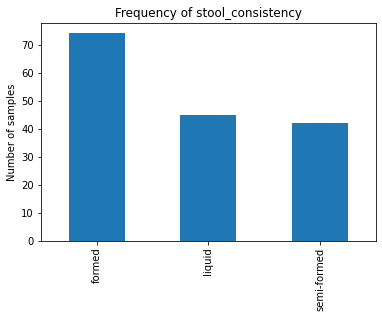

In [11]:
df_meta['stool_consistency'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of stool_consistency')
plt.show()

b) hct source(There are 4 missing data in this column):

In [12]:
df_meta['hct_source'].value_counts()

PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64

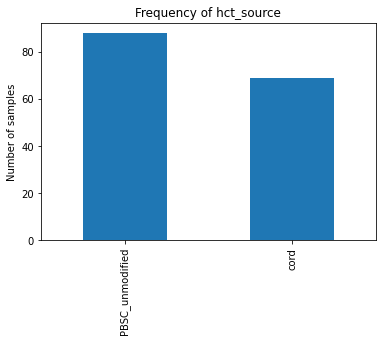

In [13]:
df_meta['hct_source'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of hct_source')
plt.show()

c) disease(4 missing data):

In [14]:
df_meta['disease'].value_counts()

Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64

In [15]:
df_meta.groupby(['disease', 'alleged_abduction']).size()

disease                    alleged_abduction
Hodgkin's Disease          0                    11
                           1                     1
Leukemia                   0                    60
                           1                    19
Myelodysplastic Syndromes  0                     5
                           1                     1
Non-Hodgkin's Lymphoma     0                    55
                           1                     5
dtype: int64

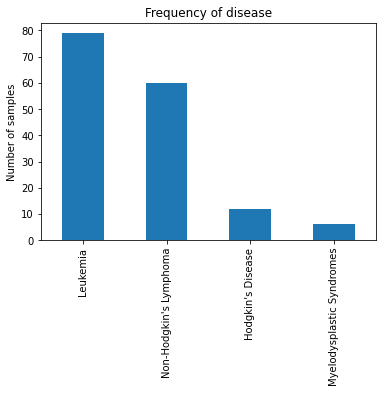

In [16]:
df_meta['disease'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of disease')
plt.show()

d)categorical_time_relative_to_engraftment(4 missing data):

In [17]:
df_meta['categorical_time_relative_to_engraftment'].value_counts()

pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64

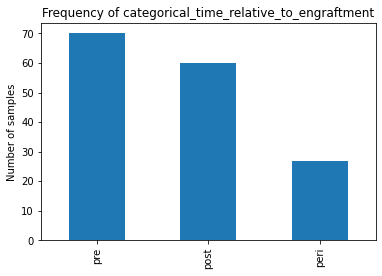

In [18]:
df_meta['categorical_time_relative_to_engraftment'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of categorical_time_relative_to_engraftment')
plt.show()

e) week_relative_to_ (first)hct(4 missing):

In [19]:
df_meta['week_relative_to_hct'].value_counts()

-1.0    71
 1.0    40
 0.0    28
 2.0     9
-2.0     9
Name: week_relative_to_hct, dtype: int64

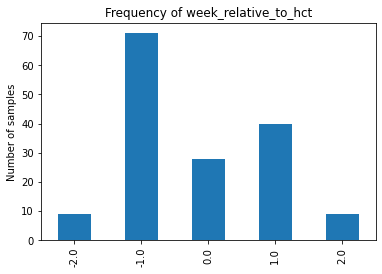

In [20]:
df_week_plot = df_meta['week_relative_to_hct'].value_counts()
df_week_plot = df_week_plot.sort_index()
df_week_plot.plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of week_relative_to_hct')
plt.show()

f)day_relative_to_nearest_hct(4 missing)

In [21]:
df_meta['day_relative_to_nearest_hct'].value_counts()

-2.0     15
-5.0     14
-6.0     12
-3.0     11
 12.0    11
 0.0     10
 13.0    10
 11.0     8
 5.0      6
 7.0      6
 15.0     5
-1.0      5
 6.0      5
 8.0      5
-9.0      5
 3.0      4
-4.0      4
-7.0      4
 4.0      4
 16.0     4
 1.0      3
 14.0     3
 9.0      2
 10.0     1
Name: day_relative_to_nearest_hct, dtype: int64

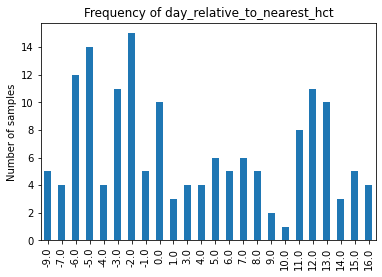

In [22]:
df_day_plot = df_meta['day_relative_to_nearest_hct'].value_counts()
df_day_plot = df_day_plot.sort_index()
df_day_plot.plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of day_relative_to_nearest_hct')
plt.show()

g)alleged_abduction:

In [23]:
df_meta['alleged_abduction'].value_counts()

0    135
1     26
Name: alleged_abduction, dtype: int64

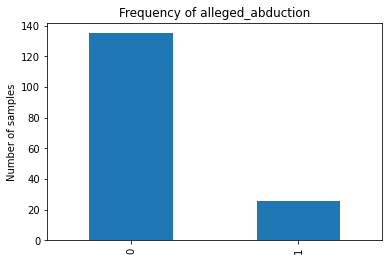

In [24]:
df_meta['alleged_abduction'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of alleged_abduction')
plt.show()

In summary of a)~g):

In [25]:
for column_name in df_meta:
    if column_name != 'sampleid':
        print(column_name)
        print(df_meta[column_name].value_counts())

stool_consistency
formed         74
liquid         45
semi-formed    42
Name: stool_consistency, dtype: int64
hct_source
PBSC_unmodified    88
cord               69
Name: hct_source, dtype: int64
disease
Leukemia                     79
Non-Hodgkin's Lymphoma       60
Hodgkin's Disease            12
Myelodysplastic Syndromes     6
Name: disease, dtype: int64
categorical_time_relative_to_engraftment
pre     70
post    60
peri    27
Name: categorical_time_relative_to_engraftment, dtype: int64
week_relative_to_hct
-1.0    71
 1.0    40
 0.0    28
 2.0     9
-2.0     9
Name: week_relative_to_hct, dtype: int64
timepoint_of_transplant
6.0      51
5.0      36
3.0      13
7.0      12
9.0       9
2.0       7
1.0       7
0.0       5
4.0       5
52.0      3
363.0     3
379.0     2
14.0      2
24.0      2
Name: timepoint_of_transplant, dtype: int64
day_relative_to_nearest_hct
-2.0     15
-5.0     14
-6.0     12
-3.0     11
 12.0    11
 0.0     10
 13.0    10
 11.0     8
 5.0      6
 7.0      6
 15.

<mark>**2.2 Testing Possible Inconsistencies**

During our group discussion, we observed that there may be some inconsistent points in the "categorical_time_relative_to_engraftment", "week_relative_to_hct", and "day_relative_to_nearest_hct" columns. For example, we know that engraftment happens after the hct. So if the categorical time is "peri", it means the patient should have had the hct already. And this should correspond to a non-negative value in the "week_relative_to_hct" column. However, "peri" only corresponds to "-1" and "0" in the "week" column. The other inconsistency is that some values in the "week" and "day" columns can not correspond to each other.

We speculated that it resulted from record errors or that some patients had multiple Hematopoietic stem cell transplantations.

To test our assumptions, we perform the following data analysis to determine the number of inconsistent data in these three columns, decide on which column to pick when we encounter inconsistencies, and to see which patients had more than one hct.

For simplicity, here we create a sub dataframe for the analysis:

In [26]:
df_meta_short = df_meta[['categorical_time_relative_to_engraftment', 'week_relative_to_hct', 'day_relative_to_nearest_hct']]
df_meta_short.head()

,categorical_time_relative_to_engraftment,week_relative_to_hct,day_relative_to_nearest_hct
0,pre,-1.0,-6.0
1,pre,-2.0,-7.0
2,peri,-1.0,0.0
3,post,1.0,8.0
4,peri,-1.0,0.0


For better observation, we first set the index of the dataframe the 'categorical_time_relative_to_engraftment' column and display the full dataframe:

In [27]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_meta_subs = df_meta_short.set_index(['categorical_time_relative_to_engraftment'])
df_meta_subs.sort_index()

,week_relative_to_hct,day_relative_to_nearest_hct
categorical_time_relative_to_engraftment,,
peri,-1.0,0.0
peri,-1.0,0.0
peri,0.0,4.0
peri,0.0,4.0
peri,0.0,3.0
peri,0.0,1.0
peri,0.0,5.0
peri,0.0,5.0
peri,0.0,3.0


Check the range of values in the 'day_nearest' column:

In [28]:
df_meta_short = df_meta_short.rename(columns={'categorical_time_relative_to_engraftment': 'cat', 'week_relative_to_hct': 'week', 'day_relative_to_nearest_hct': 'day_nearest'})
new_group = df_meta_short.groupby(['cat', 'week']).agg(['min', 'max'])
print(new_group)

          day_nearest      
                  min   max
cat  week                  
peri -1.0         0.0   0.0
      0.0         1.0   5.0
post  0.0         6.0   7.0
      1.0         8.0  14.0
      2.0        15.0  16.0
pre  -2.0        -9.0  -7.0
     -1.0        -6.0  -1.0


<mark>**my comments:**</mark>

From the output, I found that these three columns correspond well to one another as the ranges of values are perfectly continuous. I think "peri-engraftment" with -1 week relative to first hct refers to a specific situation that these patients had hct on the same day as their samples were collected, and this was possibly defined by the data collectors. And peri-engraftment is a period of 5 days after the hct. (not sure)

Can we also conclude that none of our sampled patients have had multiple hcts, since the "day" column corresponds well to the "week" column?

This indicates information redundancy in the metadata. I suggest we pay more attention the "day" column in our further work, because it is more precise. It has larger range of numbers and may be better for regression analysis.

**2.3 Link HCT time with alleged abduction**

Find out how many people claimed being abducted by aliens before/after their first hct:

In [30]:
df_ab_samples = df_meta[['week_relative_to_hct', 'alleged_abduction', 'sampleid']]
df_ab_samples = df_ab_samples.groupby(['week_relative_to_hct', 'alleged_abduction']).count()
df_ab_samples

sampleid
week_relative_to_hct alleged_abduction          
-2.0                 0                         9
-1.0                 0                        63
                     1                         8
 0.0                 0                        25
                     1                         3
 1.0                 0                        28
                     1                        12
 2.0                 0                         6
                     1                         3

**2.4 Link categorical time with diseases**

In [32]:
df_dis_samples = df_meta[['categorical_time_relative_to_engraftment', 'disease', 'sampleid']]
df_dis_samples = df_dis_samples.groupby(['categorical_time_relative_to_engraftment', 'disease']).count()
df_dis_samples

sampleid
categorical_time_relative_to_engraftment disease                            
peri                                     Hodgkin's Disease                 3
                                         Leukemia                         14
                                         Non-Hodgkin's Lymphoma           10
post                                     Hodgkin's Disease                 5
                                         Leukemia                         25
                                         Myelodysplastic Syndromes         3
                                         Non-Hodgkin's Lymphoma           27
pre                                      Hodgkin's Disease                 4
                                         Leukemia                         40
                                         Myelodysplastic Syndromes         3
                                         Non-Hodgkin's Lymphoma           23

**2.5 Reference reading**


<mark>Attached is a reference reading I found about hct:</mark>
https://www.nature.com/articles/nrc.2018.10

### 3 Potential Code to add Sequence Paths to Metadata

In [ ]:
import os
import pandas as pd

file_names = os.listdir(r"/data/sequences") # put the path to the sequences directory

df_meta = pd.read_csv('/data/sample_metadata.tsv', sep='\t')

forward_files = []
backward_files = []

for sampleid in df_meta['sampleid']:
    for file in file_names:
        name = file.split('_')[0]
        direc = file.split('_')[-1]
        if name == sampleid:
            if "R1" in direc:
                forward_files.append(file)
            if "R2" in direc:
                backward_files.append(file)
                
df_meta = df_meta.assign(forward=forward_files)
df_meta = df_meta.assign(backward=backward_files)
df_meta.head()